In [25]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
## reading data
del bike_data
bike_data = pd.read_csv('day.csv',dtype='unicode')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2,10.6061,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.4635,43.6957,12.5223,82,1518,1600


In [46]:
## Check for null values
bike_data.isnull().values.any()

False

In [47]:
## dropping columns that are irrelevant for the model - 
bike_data.drop(['instant','dteday'],axis = 1,inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.2,10.6061,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.4635,43.6957,12.5223,82,1518,1600


In [48]:
##Change the format of the elements to plot them.
bike_data.info()
columns = ['temp', 'atemp','hum', 'windspeed']
bike_data[columns] = bike_data[columns].astype(np.float)
columns = ['season', 'yr','mnth', 'holiday','weekday','workingday','weathersit','cnt']
bike_data[columns] = bike_data[columns].astype(np.int)
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   season      730 non-null    object
 1   yr          730 non-null    object
 2   mnth        730 non-null    object
 3   holiday     730 non-null    object
 4   weekday     730 non-null    object
 5   workingday  730 non-null    object
 6   weathersit  730 non-null    object
 7   temp        730 non-null    object
 8   atemp       730 non-null    object
 9   hum         730 non-null    object
 10  windspeed   730 non-null    object
 11  casual      730 non-null    object
 12  registered  730 non-null    object
 13  cnt         730 non-null    object
dtypes: object(14)
memory usage: 80.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-n

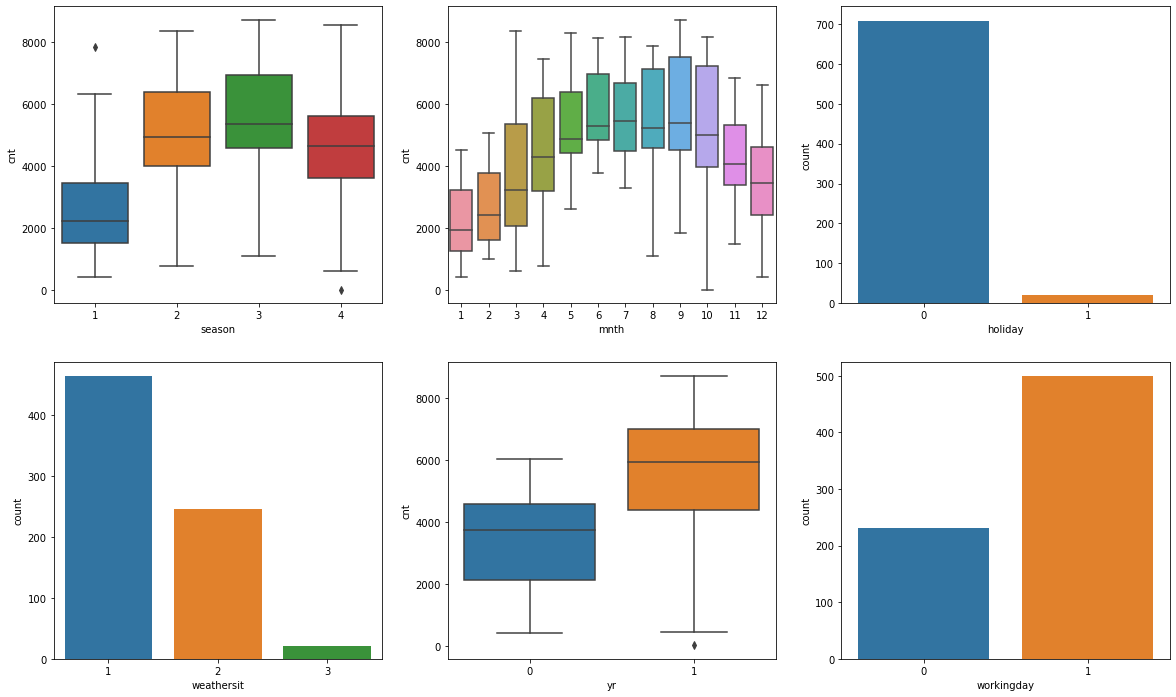

In [49]:
## Visualize the data
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.countplot(x = 'holiday', data = bike_data)
plt.subplot(2,3,4)
sns.countplot(x = 'weathersit', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.countplot(x = 'workingday', data = bike_data)
plt.show()


In [50]:
## Inference:
# 1. Based on the weather conditions the booking count decrease
# 2. During the month of Aug, sept and Oct the demand is high
# 3. During summer and fall season the demand is high when compared with winter.
# 4. Demand increase from first to fourth month
# 5. On 2019 demand is high when compared to 2018
# 6. During working day the demand is high 

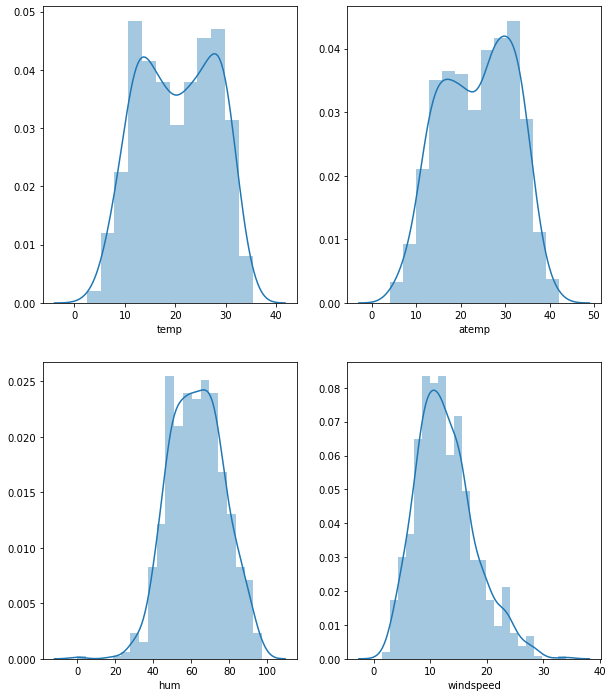

In [51]:
plt.figure(figsize=(10, 12))
plt.subplot(2,2,1)
sns.distplot(bike_data['temp'])
plt.subplot(2,2,2)
sns.distplot(bike_data['atemp'])
plt.subplot(2,2,3)
sns.distplot(bike_data['hum'])
plt.subplot(2,2,4)
sns.distplot(bike_data['windspeed'])
plt.show()


In [52]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [53]:
## categorize the data
bike_data.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
bike_data.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
bike_data.mnth = bike_data.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike_data.weekday = bike_data.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [54]:
## Pairplot to visualize the continuous data

<Figure size 1080x2160 with 0 Axes>

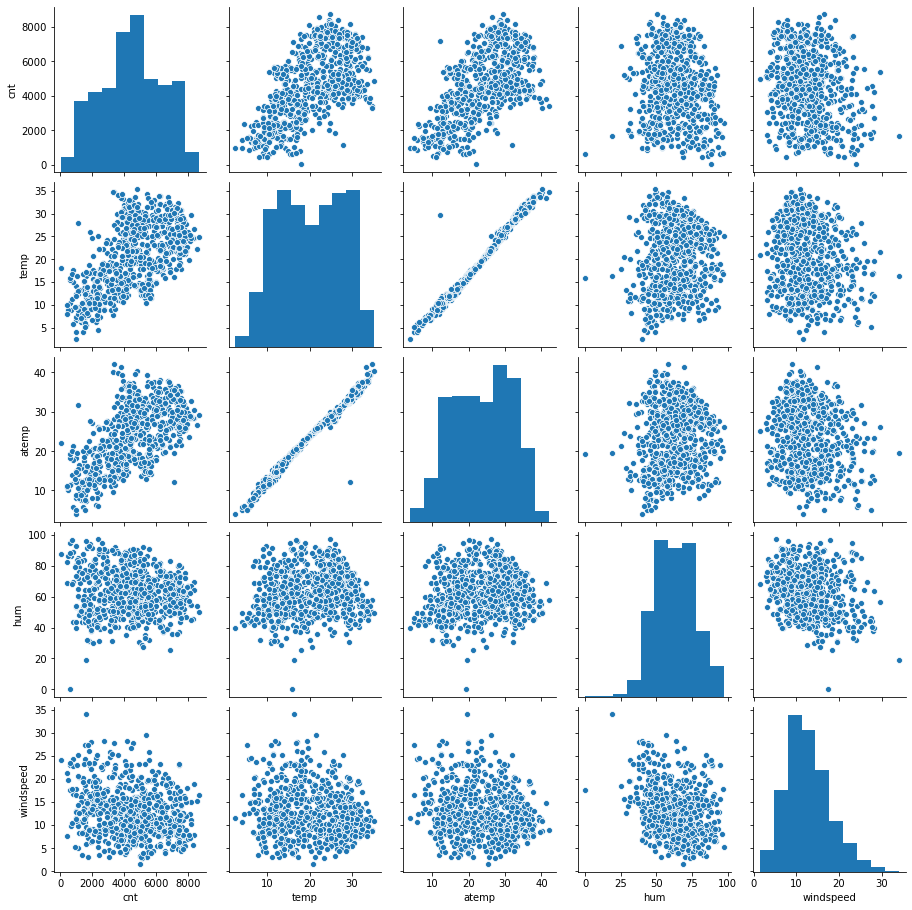

In [55]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

In [56]:
## Inference 
## Temp and Atemp have strong positive correlation with each other
## Temp and atemp have moderate positive correlation

<Figure size 1080x2160 with 0 Axes>

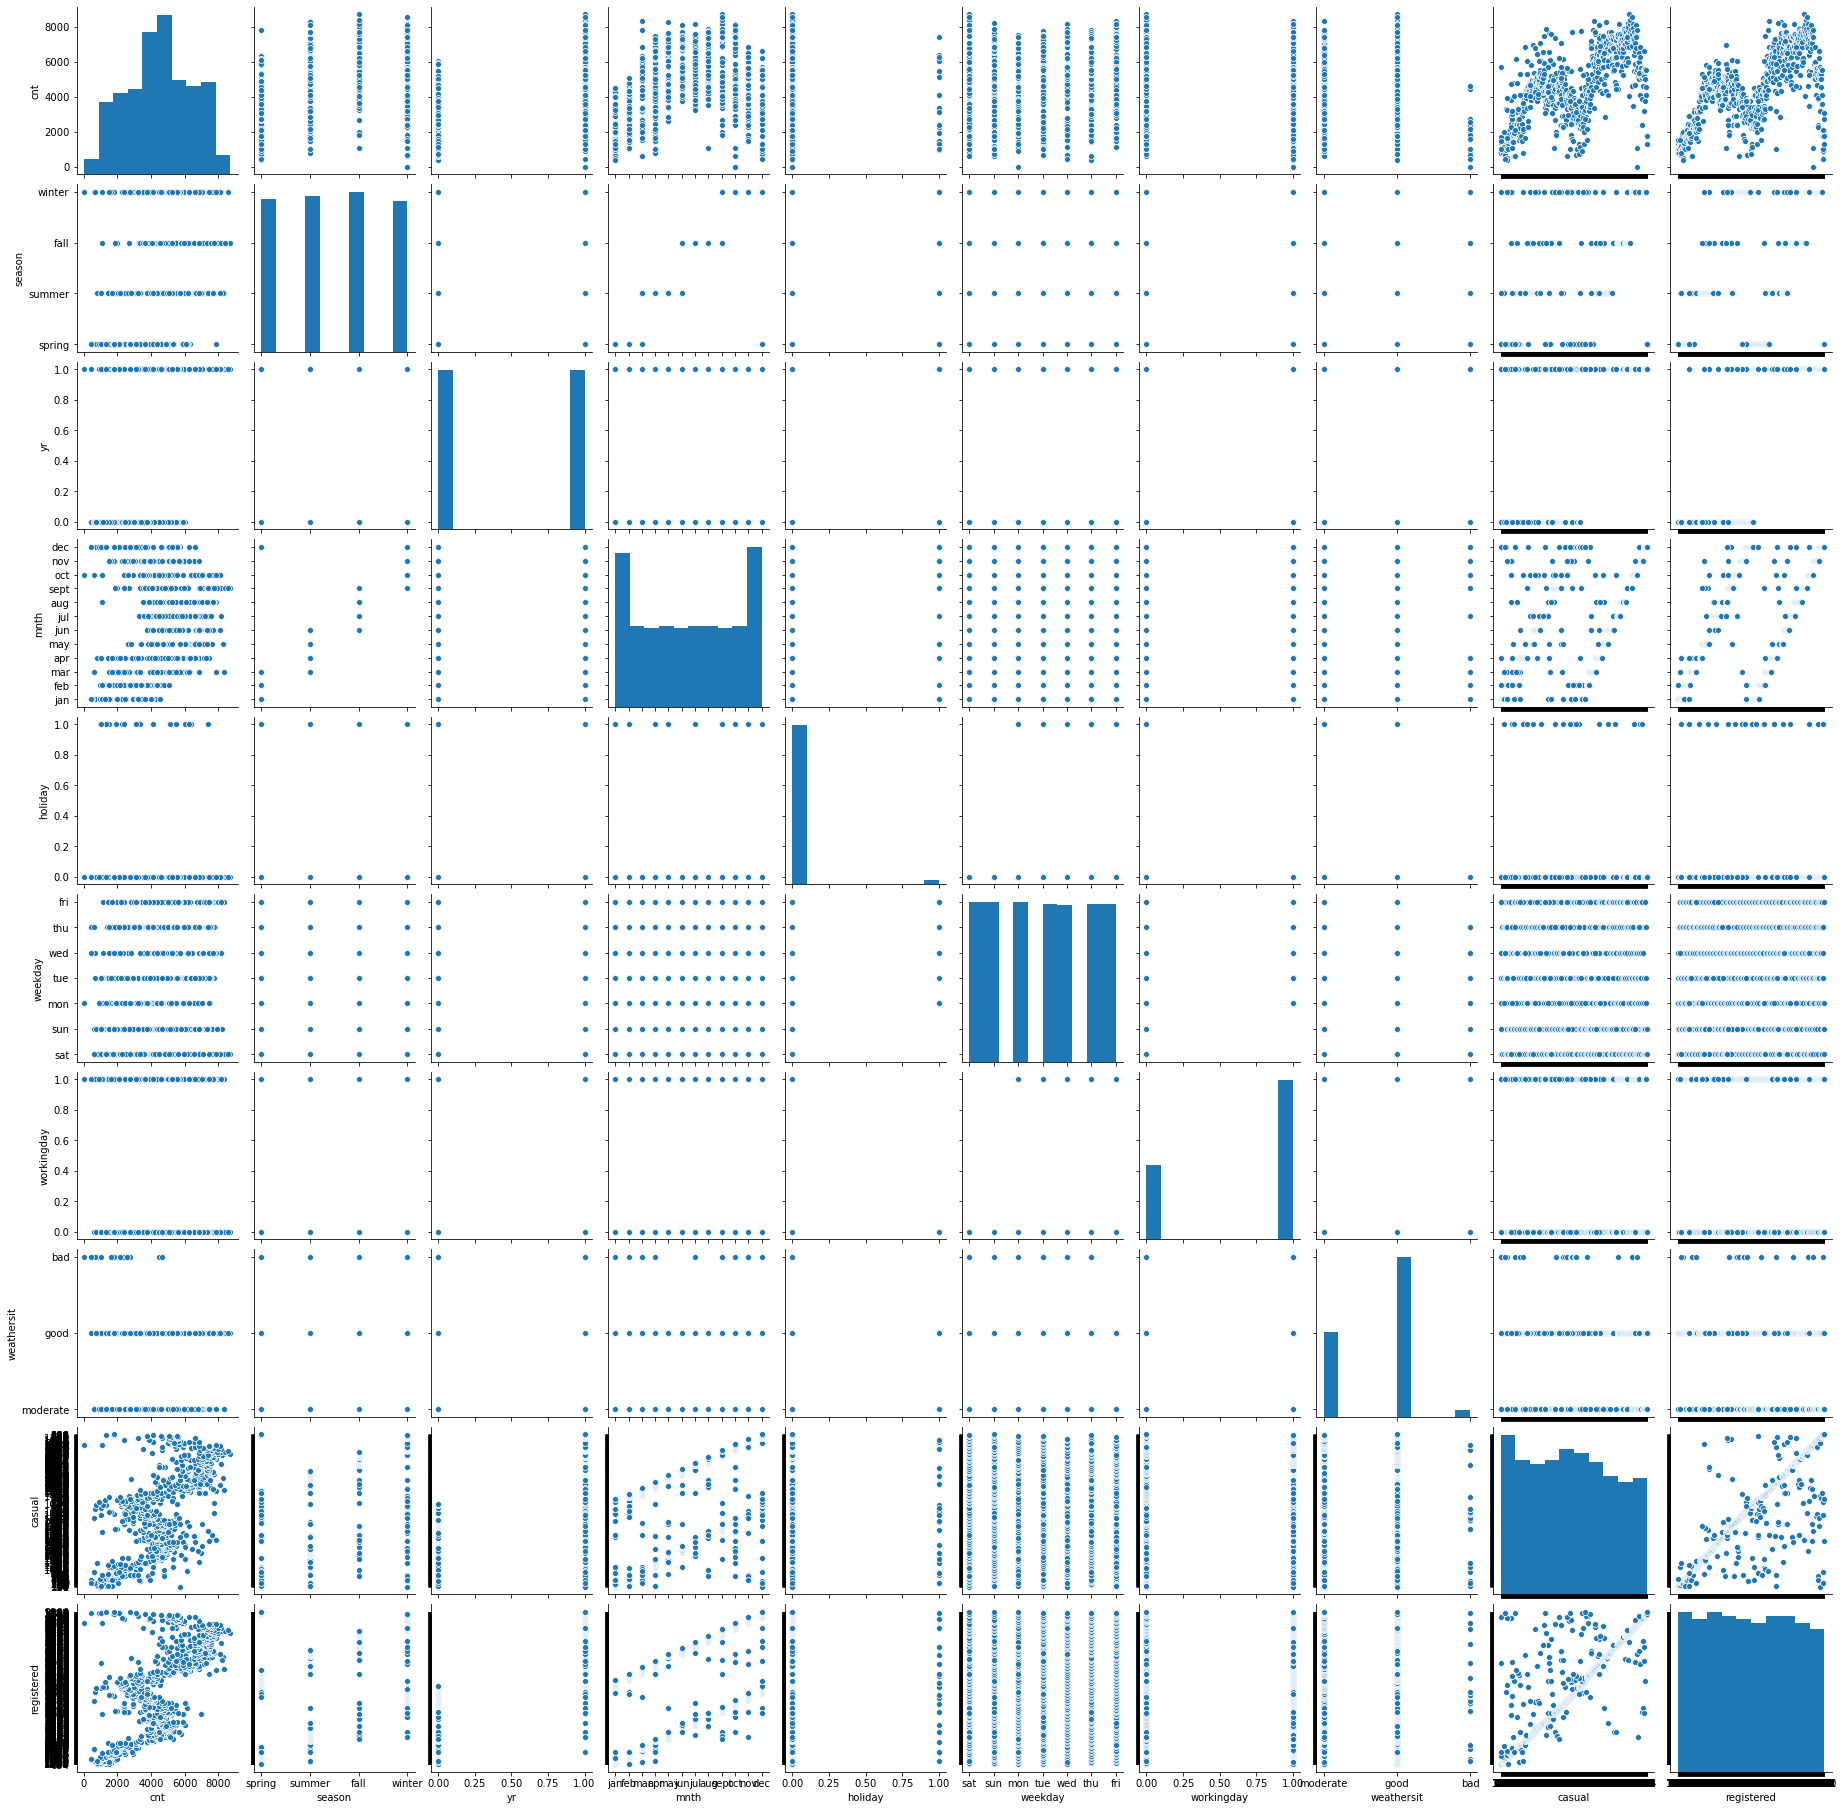

In [60]:
plt.figure(figsize=(15,30))
sns.pairplot(data=bike_data,vars=['cnt','season', 'yr', 'mnth', 'holiday','weekday', 'workingday','weathersit','casual','registered'])
plt.show()

In [61]:
## Heatmap to identify the correlation

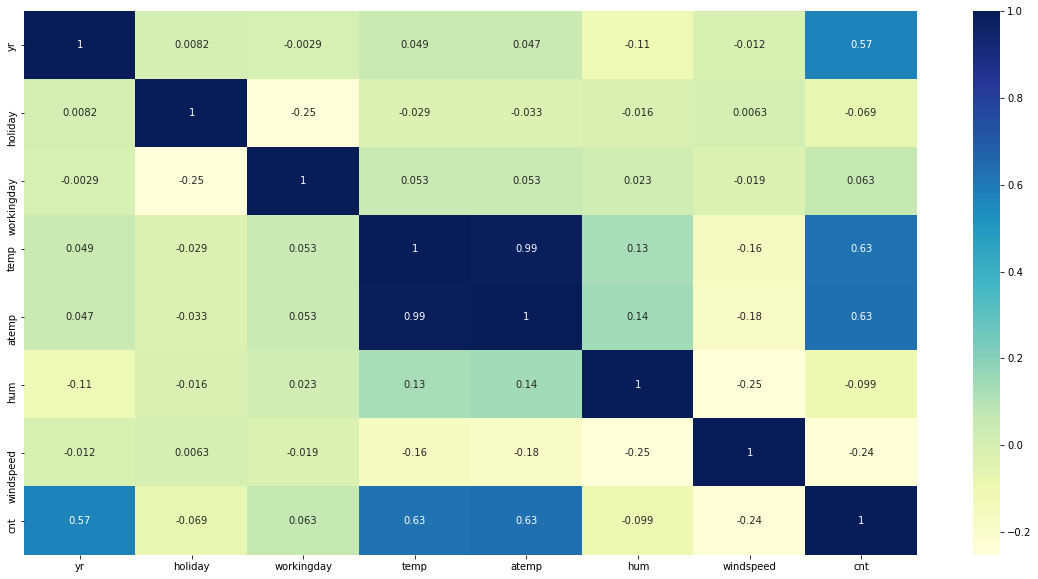

In [62]:
# Checking continuous variables relationship with each other
plt.figure(figsize = (20, 10))
sns.heatmap(bike_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Inference
## registered count and casual count is highly correlated with total count. Will need to be dropped.

In [63]:
## dropping columns that are irrelevant for the model - 
bike_data.drop(['casual','registered'],axis = 1,inplace = True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


## Data Preparation

## Step 1: Create dummy variables for all the categorical features

In [64]:
### creating dummy variables for season , mnth ,weathersit ,weekday
bike_data = pd.get_dummies(data=bike_data,columns=["season","mnth","weekday"],drop_first=True)
bike_data = pd.get_dummies(data=bike_data,columns=["weathersit"])
# Now let's see the head of our dataframe.
bike_data.head()
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

## Step 2: Divide the data to train & Test.

In [65]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [66]:
## Create independant and target variables.
y = bike_data.pop('cnt')
X = bike_data

In [67]:
## Split training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)
print(X_train.shape)
print(X_test.shape)

(510, 30)
(220, 30)


# Step 3: Perform scaling

In [68]:

scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'dummy' variables.
columns = ['hum','windspeed','temp','atemp']
X_train[columns] = scaler.fit_transform(X_train[columns])

In [69]:
X_train.head()
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.243137,0.247059,0.247059,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.429398,0.431725,0.431725,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data modelling

In [70]:
# Running RFE with the output number of the variable equal to 10
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, 13)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [71]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', False, 6),
 ('mnth_feb', False, 7),
 ('mnth_jan', False, 4),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 17),
 ('mnth_mar', False, 18),
 ('mnth_may', False, 9),
 ('mnth_nov', False, 5),
 ('mnth_oct', False, 16),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 13),
 ('weekday_wed', False, 15),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

## Model 1 
## Train model using feature not supported by RFE

In [72]:
# Features not selected by RFE
columns = X_train.columns[~rfe.support_]

In [73]:
X_train_sm = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     24.19
Date:                Wed, 12 Jan 2022   Prob (F-statistic):           2.50e-54
Time:                        22:06:33   Log-Likelihood:                -4432.0
No. Observations:                 510   AIC:                             8900.
Df Residuals:                     492   BIC:                             8976.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1785.5361    610.090      2.927      

In [74]:
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

       Features    VIF
0    workingday  15.01
1         atemp  14.80
12  weekday_sat   4.17
13  weekday_sun   3.99
16  weekday_wed   2.18
11  weekday_mon   2.01
15  weekday_tue   1.99
14  weekday_thu   1.98
5      mnth_jan   1.97
3      mnth_dec   1.64
7      mnth_mar   1.63
4      mnth_feb   1.54
2      mnth_aug   1.48
9      mnth_nov   1.47
10     mnth_oct   1.38
6      mnth_jun   1.37
8      mnth_may   1.35


## Model 2
## Train for model for RFE selected features

In [75]:
# Features selected by RFE
columns = X_train.columns[rfe.support_]
columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weathersit_bad', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [76]:
X_train_sm = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.95e-190
Time:                        22:06:34   Log-Likelihood:                -4116.5
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     497   BIC:                             8314.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1243.5729    

In [77]:
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

               Features    VIF
11      weathersit_good  46.52
12  weathersit_moderate  31.14
5         season_spring   5.02
10       weathersit_bad   4.08
2                  temp   3.61
7         season_winter   3.48
6         season_summer   2.62
3                   hum   1.89
8              mnth_jul   1.48
9             mnth_sept   1.30
4             windspeed   1.19
0                    yr   1.03
1               holiday   1.02


In [78]:
## P- value is LT 0.05 for all features
## VIF is GT 5 for weathersit_good and weather_moderate so need to drop them

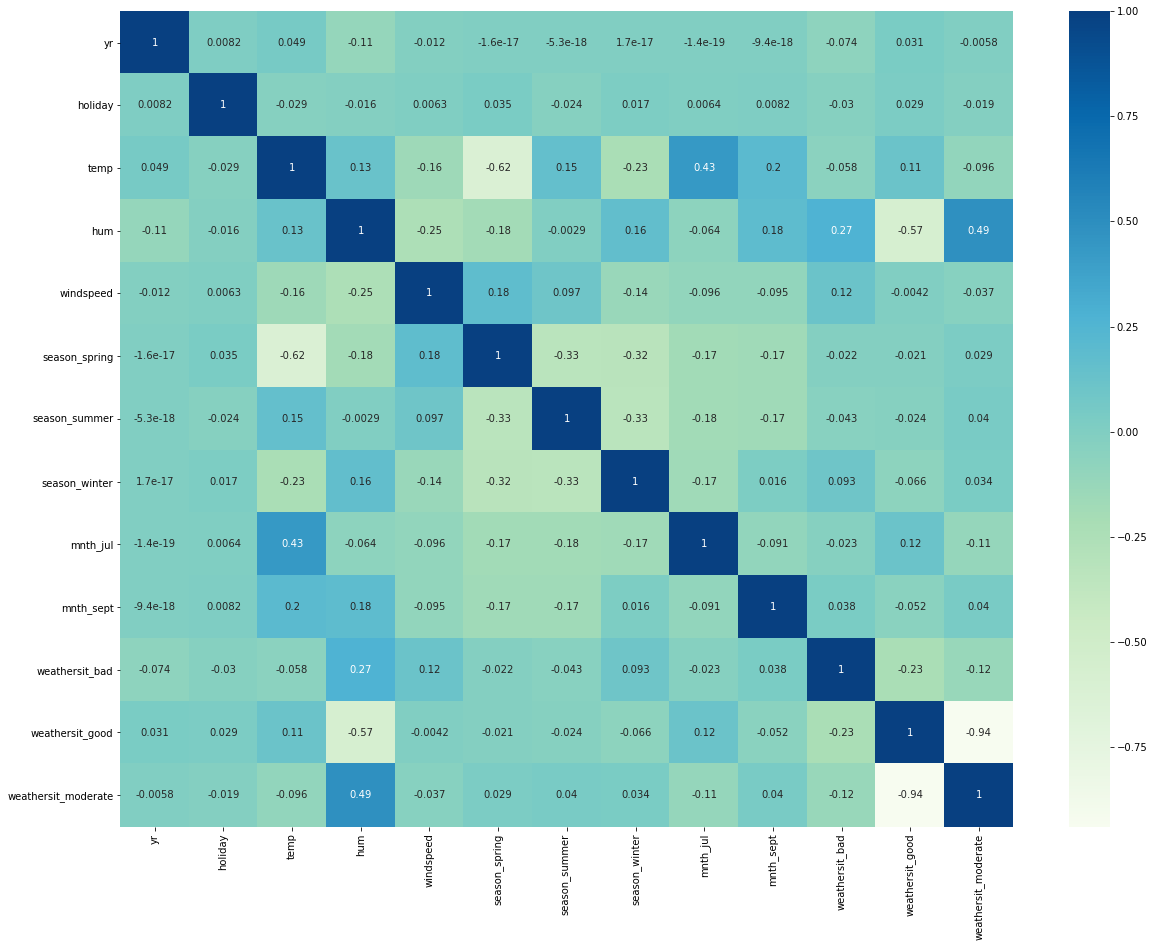

In [79]:
## Check linearity using heatmap
plt.figure(figsize = (20,15))
sns.heatmap(bike_data[columns].corr(), cmap='GnBu', annot=True)
plt.show()

In [80]:
X_train_rfe.shape

NameError: name 'X_train_rfe' is not defined

In [ ]:
## Model 3 
## Train after removing the weathersit_good and weather_moderate features.

In [ ]:
columns = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring','season_summer', 'season_winter', 'mnth_jul', 
           'mnth_sept', 'weathersit_bad']

In [ ]:
X_train_sm = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.params
print(lm.summary())

In [ ]:
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

In [81]:
##Model 4
## Drop season_spring feature where p- value GT 0.05

In [82]:
columns = ['yr', 'holiday', 'hum', 'temp', 'windspeed','season_summer', 'season_winter', 'mnth_jul', 
           'mnth_sept', 'weathersit_bad']

In [83]:
X_train_sm = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.79e-186
Time:                        22:06:37   Log-Likelihood:                -4131.6
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     499   BIC:                             8332.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2353.2170    226.501     10.

In [84]:
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

         Features    VIF
2             hum  10.29
3            temp   9.29
4       windspeed   3.54
0              yr   2.02
5   season_summer   1.76
6   season_winter   1.68
7        mnth_jul   1.55
8       mnth_sept   1.29
9  weathersit_bad   1.09
1         holiday   1.04


In [85]:
## Model 5
## Drop mnth_jul [P- value GT 0.05] and hum [VIF GT 5]

In [86]:
columns = ['yr', 'holiday', 'temp', 'windspeed','season_summer', 'season_winter',  
           'mnth_sept', 'weathersit_bad']

In [87]:
X_train_sm = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm).fit()
lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.22e-172
Time:                        22:06:38   Log-Likelihood:                -4171.6
No. Observations:                 510   AIC:                             8361.
Df Residuals:                     501   BIC:                             8399.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            782.7922    151.285      5.

In [88]:
df1 = X_train[columns]
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
print(vif.sort_values(by='VIF',ascending=False))

         Features   VIF
2            temp  3.63
3       windspeed  2.97
0              yr  2.00
4   season_summer  1.55
5   season_winter  1.34
6       mnth_sept  1.20
7  weathersit_bad  1.06
1         holiday  1.03


## Residual Analysis of the train data

In [89]:
## dropping columns that are irrelevant for the model - 
X_train.drop(['mnth_jul','hum','season_spring','weathersit_good', 'weathersit_moderate'],axis = 1,inplace = True)

In [90]:
#Build a model with above columns
columns = ['yr', 'holiday', 'temp', 'windspeed','season_summer', 'season_winter',  
           'mnth_sept', 'weathersit_bad']
lr1 = LinearRegression()
lr1.fit(X_train[columns],y_train)
print(lr.intercept_)
print(lr.coef_)

1754.2328471262495
[ 2021.22653158  -434.01466019   308.11456743  3372.35855344
   513.22070626 -1321.31947497 -1595.88640166  -394.22281722
   368.27357646   930.74441111   193.57132911  -384.83146916
  -280.89209245  -548.15282806  -283.85061066    52.254881
    13.5128198    222.00029357  -346.1019704     67.04487569
   754.12334098  -187.95760737   298.58514518  -172.68505243
   -84.5754627   -160.26924999   -51.25688638 -1305.04638424
   911.19963497   393.84674927]


In [91]:
X_train.shape
#X_train = np.arange(10).reshape((-1, 2))
y_train_pred = lr.predict(X_train[columns])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 30 is different from 8)

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                         

NameError: name 'y_train_pred' is not defined

<Figure size 432x288 with 0 Axes>

In [93]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

NameError: name 'y_train_pred' is not defined

## Predict for test data

In [94]:
#Scale variables in X_test
columns = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[columns] = scaler.transform(X_test[columns])

In [95]:
#Columns from our final model
columns = ['yr', 'holiday', 'temp', 'windspeed','season_summer', 'season_winter',  
           'mnth_sept', 'weathersit_bad']

#Predict the values for test data
y_test_pred = lr.predict(X_test[columns])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 30 is different from 8)

In [96]:
r2_score(y_test,y_test_pred)

NameError: name 'y_test_pred' is not defined

## Final Model

In [97]:
columns = ['yr', 'holiday', 'temp', 'windspeed','season_summer', 'season_winter',  
           'mnth_sept', 'weathersit_bad']
X_train_sm = sm.add_constant(X_train[columns])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     256.6
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.22e-172
Time:                        22:06:42   Log-Likelihood:                -4171.6
No. Observations:                 510   AIC:                             8361.
Df Residuals:                     501   BIC:                             8399.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            782.7922    151.285      5.

## Inference:
# During Holidays the booking count will decrease
# As windspeed increase the bike sharing count will decrease
# Less booking when the weather is bad.